# Problem set 2: Hands on with sustainability models

This problem set will have you work through several sustainability models. To turn this in, please submit a PDF of your completed notebook and upload to the assignment on canvas. There are lots of ways to convert a completed Jupyter Notebook to PDF, including the Export feature in VS Code in the "..." options menu above this notebook. The most robust way is to use Quarto (https://quarto.org/docs/getting-started.html), which I had you install as a VS Code Extension. The easiest way to do that is open up a Command Prompt/Terminal in the folder where your notebook is and type `quarto render problem_set_2.ipynb --to pdf`. This will create a PDF in the same folder as your notebook.



## Required imports

In [1]:
import os, sys
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dicelib  # https://github.com/mptouzel/PyDICE

import ipywidgets as widgets  # interactive display

plt.style.use(
    "https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle"
)

%matplotlib inline
sns.set_style("ticks", {"axes.grid": False})
params = {"lines.linewidth": "3"}
plt.rcParams.update(params)
display(HTML("<style>.container { width:100% !important; }</style>"))

## Helper Functions

In [18]:
def plot_future_returns(gamma, random_seed, time_steps):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    np.random.seed(random_seed)
    undiscounted_utility_time_series = np.random.rand(time_steps)
    ax[0].plot(undiscounted_utility_time_series)

    discounted_utility_time_series = undiscounted_utility_time_series * np.power(
        gamma, np.arange(time_steps)
    )
    ax[0].plot(discounted_utility_time_series)

    cumulsum_discounted_utility_time_series = np.cumsum(discounted_utility_time_series)
    ax[1].plot(
        cumulsum_discounted_utility_time_series * (1 - gamma),
        color="C1",
        label=r"discounted on $1/(1-\gamma)=$"
        + "\n"
        + r"$"
        + str(round(1 / (1 - gamma)))
        + "$-step horizon",
    )
    cumulsum_undiscounted_utility_time_series = np.cumsum(
        undiscounted_utility_time_series
    )
    ax[1].plot(
        cumulsum_undiscounted_utility_time_series
        / cumulsum_undiscounted_utility_time_series[-1],
        label="undiscounted",
        color="C0",
    )
    ax[1].axvline(1 / (1 - gamma), ls="--", color="k")

    ax[0].set_ylabel("utility at step t")
    ax[0].set_xlim(0, time_steps)
    ax[0].set_xlabel("time steps into the future")
    ax[1].legend(frameon=False)
    ax[1].set_ylabel("future return (normalized)")
    ax[1].set_xlabel("time steps into the future")
    ax[1].set_xlim(0, time_steps)
    fig.tight_layout()

## Question 1

Write a for loop that tests the DICE model to see how the total damages in 2100 change when there is a value of 2 versus 3 for the damage function coefficient. Output a figure for each of the two values and then report out the actual value of total damage

### Reminder on some key python terms:

To iterate over a list, you use a for loop:


c:\Users\ryanm\mambaforge\envs\env8601\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -4517.318953976377
            Iterations: 94
            Function evaluations: 19029
            Gradient evaluations: 94
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4416.943986620645
            Iterations: 92
            Function evaluations: 18626
            Gradient evaluations: 92
Total Damages in trillions 2010 USD per year 
 a3 = 2  182.411 
 a3 = 3  277.958


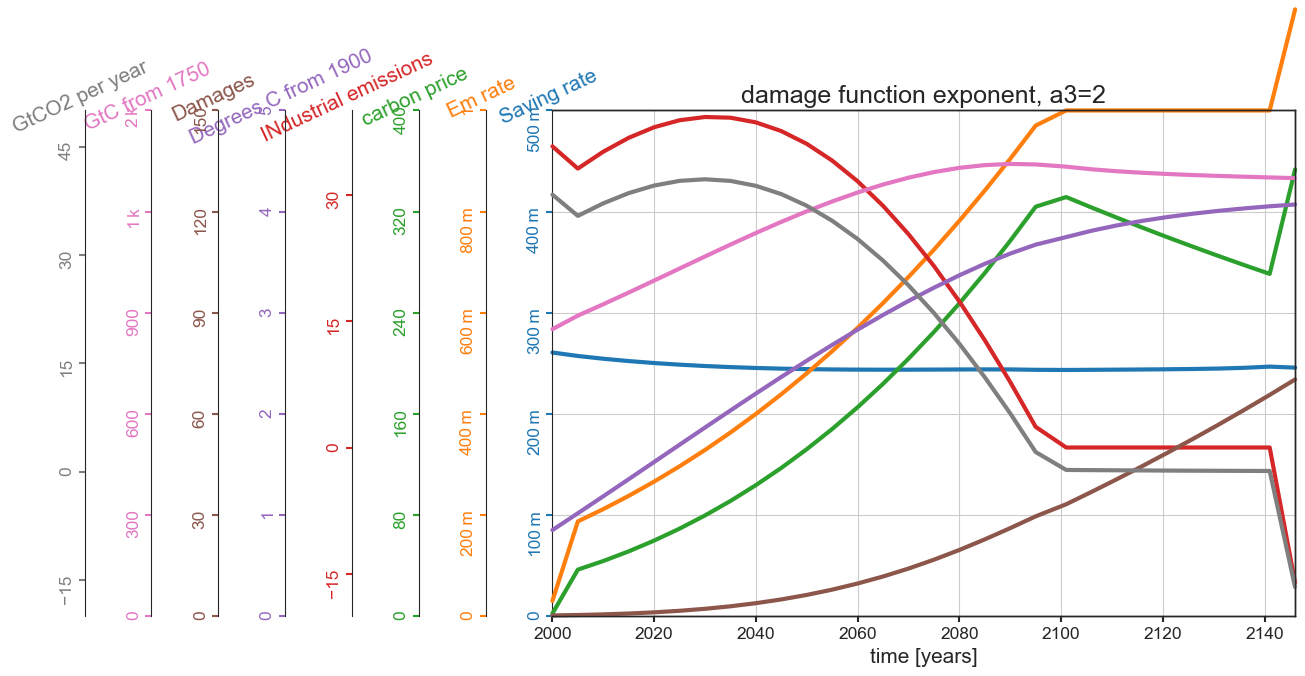

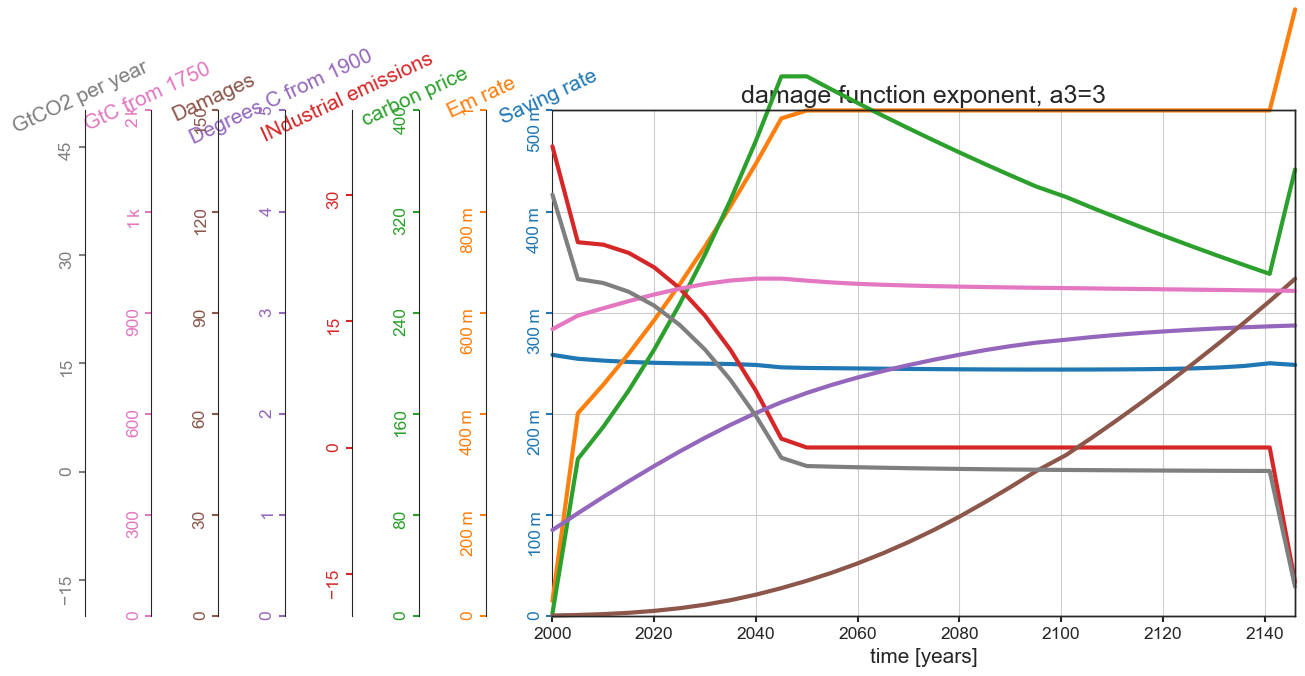

In [52]:
my_damages = []

# For loop at different damages
for a3 in [2, 3]:
    # Create the plots
    dice = dicelib.DICE()
    dice.init_parameters(a3=a3)
    dice.init_variables()
    controls_start, controls_bounds = dice.get_control_bounds_and_startvalue()
    dice.optimize_controls(controls_start, controls_bounds)
    dice.roll_out(dice.optimal_controls)
    dice.plot_run("damage function exponent, a3=" + str(a3))
    # Capture total damages up until 2100 
    my_damages.append(sum(dice.DAMAGES[0:20]))

# Present total damages
print("Total Damages in trillions 2010 USD per year \n", 
      "a3 = 2 ", "{:,.3f}".format(my_damages[0]), "\n",
      "a3 = 3 ", "{:,.3f}".format(my_damages[1]))

The first step to solve this will be create a new dice model object. You will then call methods from that object like this: dice.method_name()

Use the init methods, but ensuring you use the correct damage function parameter. Calling the .init_parameters() method with no arguments gives you the default parameters, but you can overwrite the default by passing specific values like this: `dice.init_parameters(alpha=0.2, eta=0.3)`. You will want to change the exponent in the damage function. If you can't figure out what coefficient it is, you can learn this by poking around in the dicelib.py file. To get the total damages at the right year, you will have to inspect the model outputs and call the right year out of the list. You can access an element in a list like this: `my_value = my_list[0]`. Remember that python is 0-indexed, so the first element is at index 0.


## Question 2

Run the MAGICC model for the 4 main RCPs (2.6, 4.5, 7.0, 8.5). Plot the temperature of each pathway on (a single or seperate) graphs. Report out what is the expected temperature in 2100 for each RCP.

In [56]:
# Bring in Dependencies
import pymagicc
from pymagicc.scenarios import read_scen_file
from pymagicc import rcps
import scmdata

c:\Users\ryanm\mambaforge\envs\env8601\Lib\site-packages\pymagicc\io\base.py:224: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
c:\Users\ryanm\mambaforge\envs\env8601\Lib\site-packages\pymagicc\io\base.py:224: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
c:\Users\ryanm\mambaforge\envs\env8601\Lib\site-packages\pymagicc\io\base.py:224: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
c:\Users\ryanm\mambaforge\envs\env8601\Lib\site-packages\pymagicc\io\base.py:224: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
c:\Users\ryanm\mambaforg

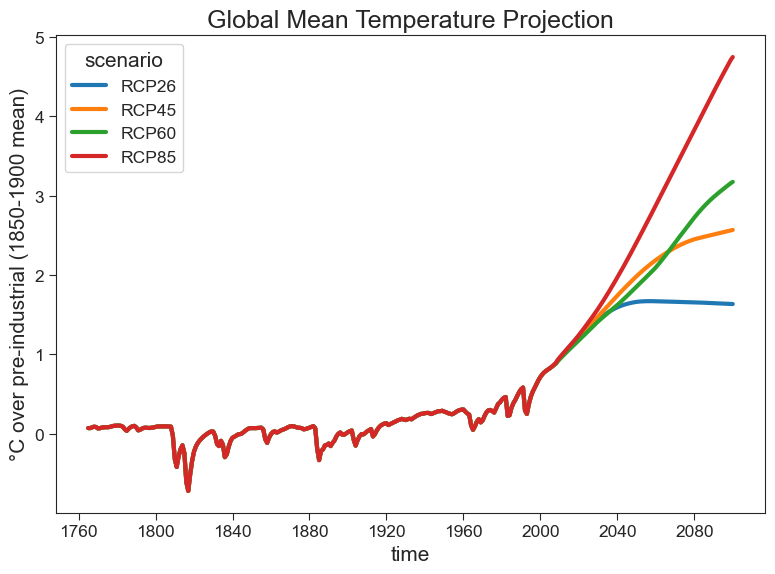

In [57]:
# Plot 4 main RCPs (2.6, 4.5, 7.0, 8.5)

# TODO: Need to change final year to 2100. And need to capture the final temperature.

results = []
for scen in rcps.groupby("scenario"):
    results_scen = pymagicc.run(scen)
    results.append(results_scen)

results = scmdata.run_append(results)

temperature_rel_to_1850_1900 = (
    results
    .filter(variable="Surface Temperature", region="World")
    .relative_to_ref_period_mean(year=range(1850, 1900 + 1))
)

temperature_rel_to_1850_1900.lineplot()
plt.title("Global Mean Temperature Projection")
plt.ylabel("°C over pre-industrial (1850-1900 mean)");
# Run `plt.show()` to display the plot when running this example
# interactively or add `%matplotlib inline` on top when in a Jupyter Notebook.


In [87]:
# Extract temperature values
temperature_values = results.filter(variable="Surface Temperature").timeseries()
temp = {}
temp["RCP26"] = temperature_values["2100-01-01"][0]
temp["RCP45"] = temperature_values["2100-01-01"][5]
temp["RCP60"] = temperature_values["2100-01-01"][10]
temp["RCP85"] = temperature_values["2100-01-01"][15]
temp


c:\Users\ryanm\mambaforge\envs\env8601\Lib\site-packages\scmdata\run.py:905: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  df.columns = pd.Index(columns, name="time")
C:\Users\ryanm\AppData\Local\Temp\ipykernel_16860\622823137.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp["RCP26"] = temperature_values["2099-01-01"][0]
C:\Users\ryanm\AppData\Local\Temp\ipykernel_16860\622823137.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  te

{'RCP26': 1.5637071,
 'RCP45': 2.4918067,
 'RCP60': 3.0873615,
 'RCP85': 4.6418887}

## Question 3

The DICE version that we ran above is the 2016 version of Nordhaus' model. Recently, Nordhaus and team released a new version, documented in Barrage and Nordhaus (2023). Read the paper and compare it to what was in the 2016 version and summarize in 2-3 paragraphs what the main differences are with emphasis on explaining the technical differences (i.e., what coefficient changed and what were its new and old values). You may want to look through the code the Lint Barrange and William Nordhaus put online, which can be found here: https://yale.app.box.com/s/whlqcr7gtzdm4nxnrfhvap2hlzebuvvm

`Answer`

As Barrage and Nordhaus state in the intro, "The revision contains major changes in the carbon and climate modules, the treatment of non-industrial greenhouse gases, discount rates, as well as updates on all the major components. The major changes are a significantly lower level of temperature of the cost-benefit optimal policy, a lower cost of reaching the 2° C target, an analysis of the impact of the Paris Accord, and a major increase in the estimated social cost of carbon."

Reading through the working paper, and examining the code, there are a few specific modifications to the carbon and climate modules of the intergrated assessment model (IAM). $\rho$ decreased from 0.015 to 0.010, and $\phi$ increased from 1.45 to 1.5. The damage function, while the same functional form, is updated with literature from 2023. This is a 3.12% loss from $3^\circ$ warming over pre-industrial temperatures and 12.5% loss of output for $6^\circ$ warming. Both of these are larger than than the 2016 version of DICE. There is also a minor addition of updating the abatement cost for carbon emissions. 

One note-worthy addition is that the DICE model now uses a carbon tax as a control variable as opposed to an emissions control rate that was used in previous versions. 